<a href="https://colab.research.google.com/github/TinusLopez/Challenge1-AluraStore/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Lavavajillas,Electrodomésticos,1084800.0,56000.0,11/11/2022,Rafael Acosta,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175
1,Cama box,Muebles,473800.0,25400.0,03/01/2020,Izabela de León,Cúcuta,5,Tarjeta de crédito,2,7.89391,-72.50782
2,Balón de baloncesto,Deportes y diversión,23700.0,0.0,25/12/2022,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
3,Modelado predictivo,Libros,57700.0,1300.0,23/11/2021,Lucas Olivera,Medellín,3,Nequi,1,6.25184,-75.56359
4,Auriculares,Electrónicos,138900.0,5600.0,25/04/2022,Blanca Ramirez,Bogotá,4,Tarjeta de crédito,7,4.60971,-74.08175


In [21]:
# Mostrar los nombres de las columnas
print(tienda.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


#1. Análisis de facturación




=== Ingresos Totales por Tienda ===
     Tienda  Ingreso Total (COP)
0  Tienda 1         1.150880e+09
1  Tienda 2         1.116344e+09
2  Tienda 3         1.098020e+09
3  Tienda 4         1.038376e+09


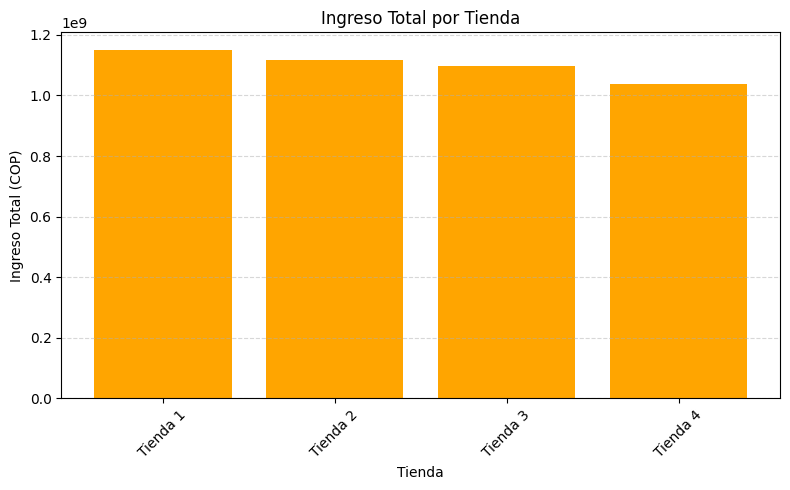

In [31]:
# Diccionario de cada tienda
tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}


ingresos = {}

for nombre_tienda, df in tiendas.items():
    if 'Precio' in df.columns:
        total = df['Precio'].sum()
    else:
        print(f"No se encontró la columna de precios en {nombre_tienda}")
        total = 0
    ingresos[nombre_tienda] = total

# Convertimos el diccionario a un DataFrame para visualizar mejor
ingresos_df = pd.DataFrame(
    list(ingresos.items()),
    columns=['Tienda', 'Ingreso Total (COP)']
)

print("\n=== Ingresos Totales por Tienda ===")
print(ingresos_df)

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(ingresos_df['Tienda'], ingresos_df['Ingreso Total (COP)'], color='orange')
plt.title('Ingreso Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total (COP)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

Ventas por Categoría por Tienda:
{'Tienda 1': Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64, 'Tienda 2': Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64, 'Tienda 3': Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64, 'Tienda 4': Categoría del Producto
M

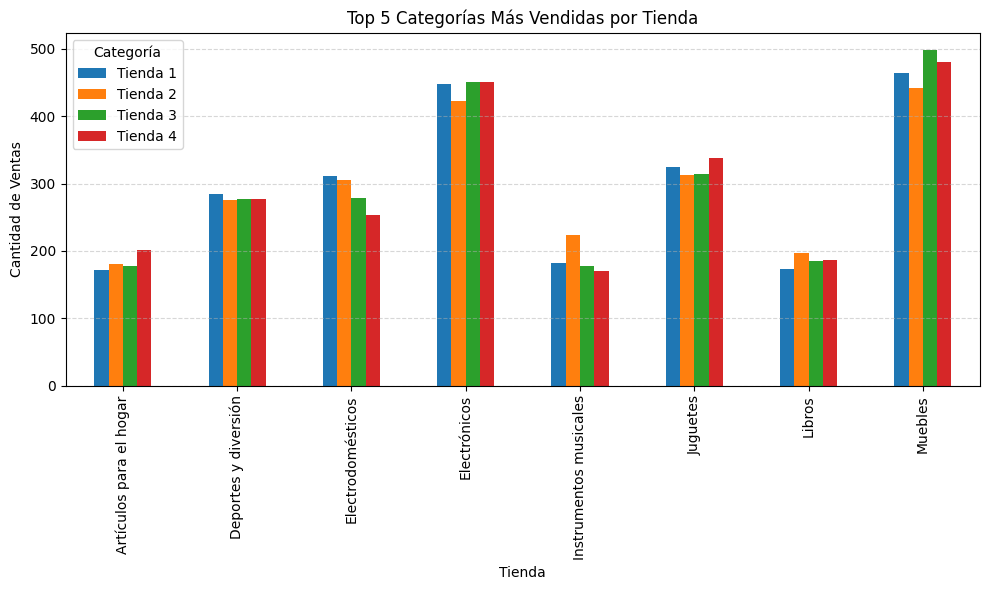

In [30]:
# Diccionario de tiendas (suponiendo que tienda1, tienda2, etc., ya están definidos)
tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

ventas_categoria = {}

# Recorremos las tiendas y calculamos el conteo de categorías
for nombre, tienda in tiendas.items():
    for col in tienda.columns:
        if "categoría" in col.lower() or "category" in col.lower():
            conteo = tienda[col].value_counts()
            ventas_categoria[nombre] = conteo
            break

# Verifica que el diccionario ventas_categoria tenga los datos correctos
print("Ventas por Categoría por Tienda:")
print(ventas_categoria)

# Convertimos el diccionario en un DataFrame para mejor visualización
ventas_categoria_df = pd.DataFrame(ventas_categoria).fillna(0).astype(int)

# Verificamos si el DataFrame se ha creado correctamente
print("\n=== Ventas por Categoría en Todas las Tiendas ===")
print(ventas_categoria_df)

# Seleccionamos las 5 categorías más populares en total (sumando las ventas de todas las tiendas)
top_categorias = ventas_categoria_df.sum(axis=0).sort_values(ascending=False).head(5).index
ventas_top = ventas_categoria_df[top_categorias]

# Gráfico de barras para las 5 categorías más vendidas por tienda
ventas_top.plot(kind='bar', figsize=(10,6))
plt.title('Top 5 Categorías Más Vendidas por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Cantidad de Ventas')
plt.legend(title='Categoría')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda



=== Calificación Promedio por Tienda ===
Tienda 1: 3.98
Tienda 2: 4.04
Tienda 3: 4.05
Tienda 4: 4.00


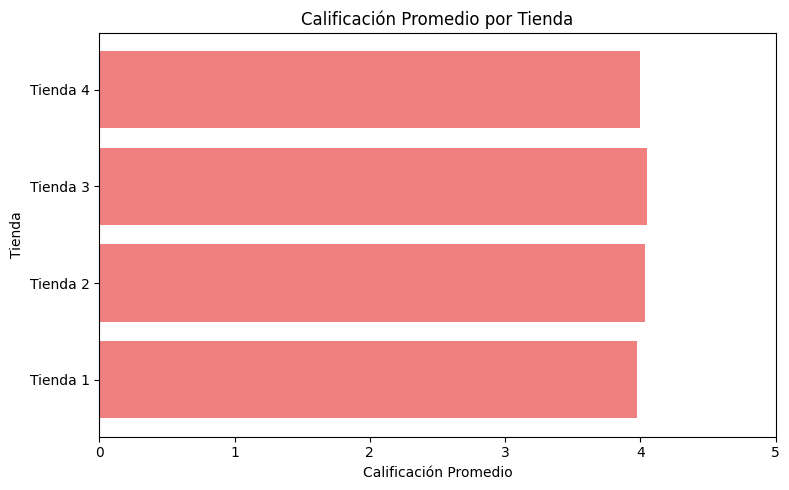

In [25]:
# Diccionario
calif = {}

# Recorremos las tiendas
for nombre, df in tiendas.items():
    calif[nombre] = df['Calificación'].mean()

# Mostramos los resultados
print("\n=== Calificación Promedio por Tienda ===")
for tienda, promedio in calif.items():
    print(f"{tienda}: {promedio:.2f}")

# Gráfico de barras horizontal
plt.figure(figsize=(8, 5))
plt.barh(list(calif.keys()), list(calif.values()), color='lightcoral')  # Cambio aquí para barra horizontal
plt.title('Calificación Promedio por Tienda')
plt.xlabel('Calificación Promedio')
plt.ylabel('Tienda')
plt.xlim(0, 5)  # Definimos el rango de calificación entre 0 y 5
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos


=== Top 5 Productos más vendidos en Tienda 1 ===
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64


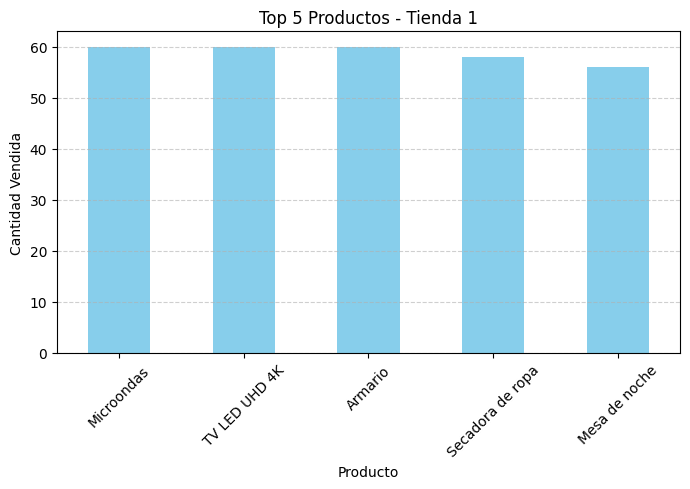


=== Top 5 Productos más vendidos en Tienda 2 ===
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64


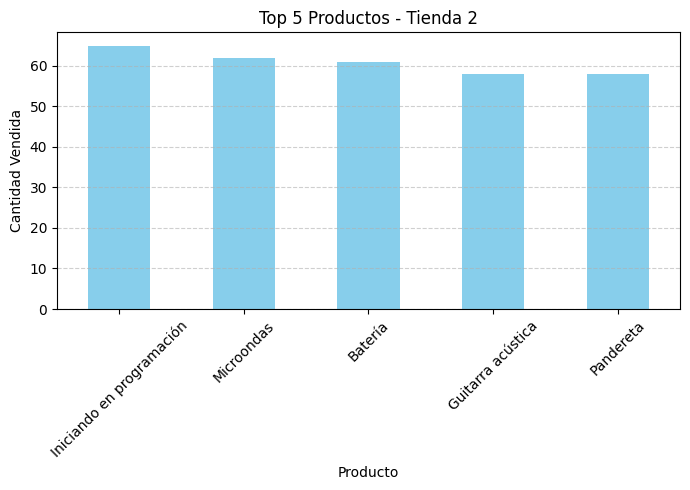


=== Top 5 Productos más vendidos en Tienda 3 ===
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55
Name: count, dtype: int64


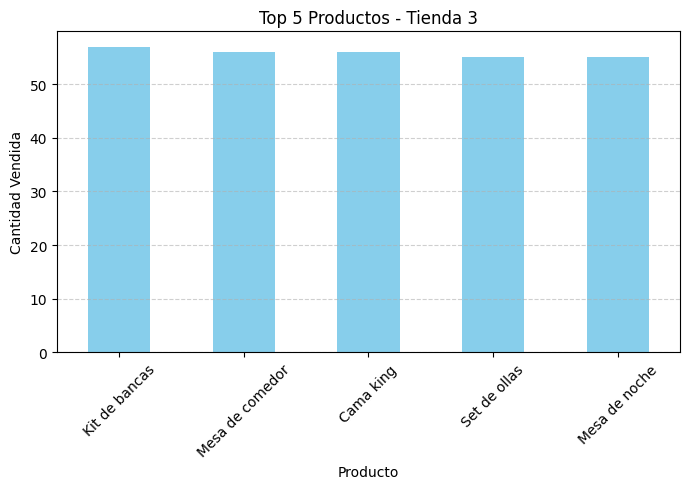


=== Top 5 Productos más vendidos en Tienda 4 ===
Producto
Cama box                     62
Cubertería                   59
Dashboards con Power BI      56
Cama king                    56
Carrito de control remoto    55
Name: count, dtype: int64


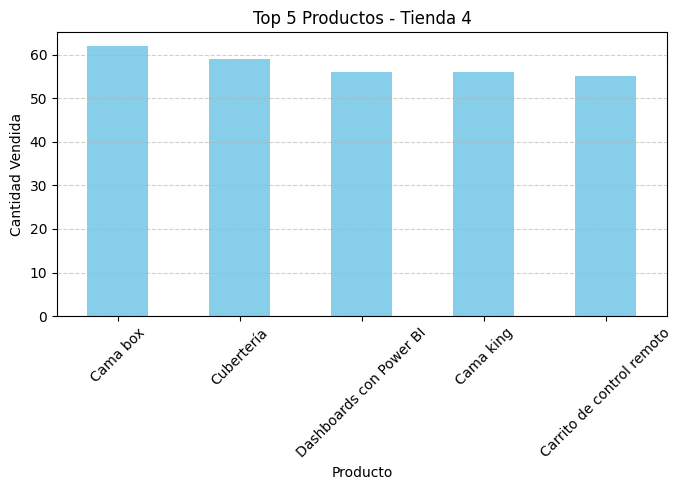

In [32]:
# Diccionario
top5 = {}

# Recorremos las tiendas y calculamos el Top 5 de productos más vendidos
for nombre, df in tiendas.items():
    top5[nombre] = df['Producto'].value_counts().head(5)

    # Mostrar resultados en consola
    print(f"\n=== Top 5 Productos más vendidos en {nombre} ===")
    print(top5[nombre])

    # Gráfico de barras para los Top 5 productos más vendidos
    plt.figure(figsize=(7, 5))
    top5[nombre].plot(kind='bar', color='skyblue')
    plt.title(f'Top 5 Productos - {nombre}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


# 5. Envío promedio por tienda

---




=== Costo Promedio de Envío por Tienda ===
     Tienda  Costo Promedio
0  Tienda 1    26018.609580
1  Tienda 2    25216.235693
2  Tienda 3    24805.680373
3  Tienda 4    23459.457167


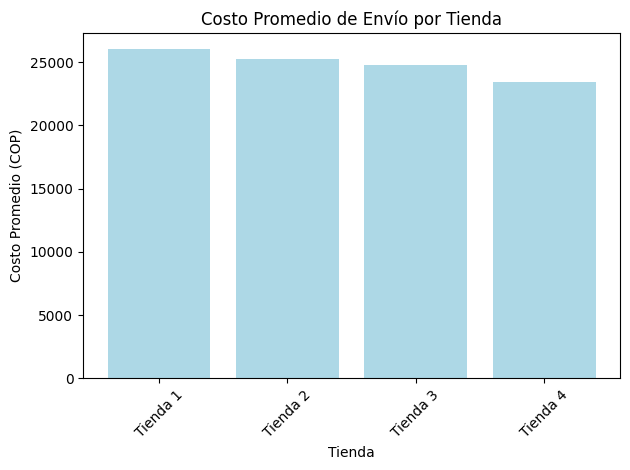

In [33]:
# Diccionario con las 4 tiendas
tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Guardamos los costos promedio de envío
costos_envio = {}

for nombre, datos in tiendas.items():
    if 'Costo de envío' in datos.columns:
        costos_envio[nombre] = datos['Costo de envío'].mean()
    else:
        costos_envio[nombre] = 0  # Si no hay columna, ponemos 0

# Creamos el DataFrame
envio_df = pd.DataFrame(costos_envio.items(), columns=['Tienda', 'Costo Promedio'])

# Mostramos los resultados
print("\n=== Costo Promedio de Envío por Tienda ===")
print(envio_df)

# Gráfico de barras
plt.bar(envio_df['Tienda'], envio_df['Costo Promedio'], color='lightblue')
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo Promedio (COP)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 6. Cuál es el costo promedio del envío desde la tienda hasta el lugar de cada uno de los clientes.

---


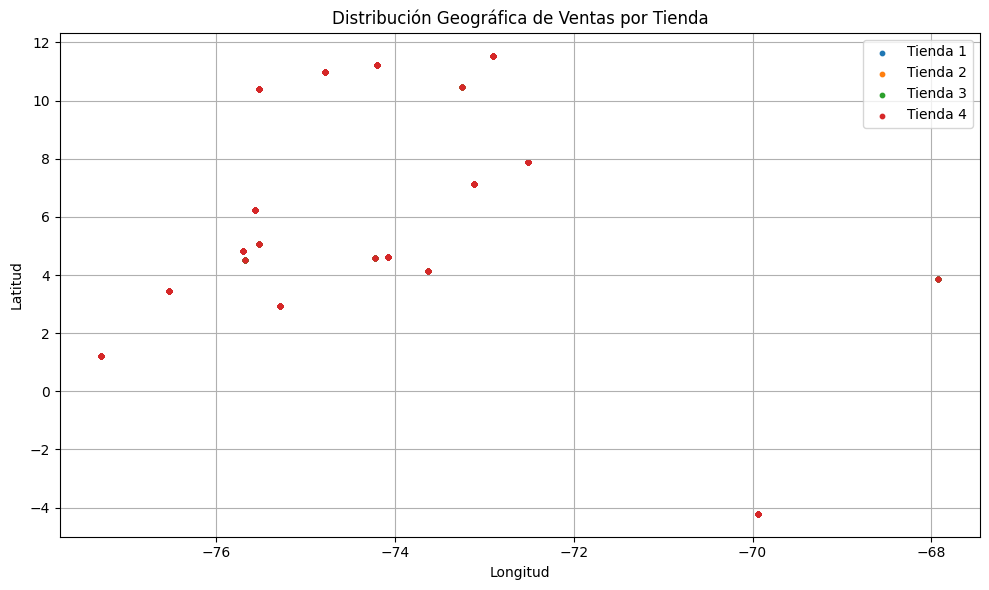

Mapa de calor guardado como 'mapa_ventas.html'


In [35]:
# Datos de ejemplo para las tiendas (asumimos que ya tienes las coordenadas lat y lon)
tiendas = {
    'Tienda 1': tienda1,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Crear un gráfico de dispersión para visualizar las ventas por tienda
plt.figure(figsize=(10, 6))

# Iteramos sobre cada tienda y sus datos
for nombre, df in tiendas.items():
    if 'lat' in df.columns and 'lon' in df.columns:  # Verificamos que haya latitud y longitud
        plt.scatter(df['lon'], df['lat'], label=nombre, s=10)

# Añadimos detalles al gráfico
plt.title('Distribución Geográfica de Ventas por Tienda')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Crear un mapa básico de calor utilizando Folium
mapa = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=6)

# Para cada tienda, agregar los puntos de calor con la información de ventas
for nombre, df in tiendas.items():
    if 'lat' in df.columns and 'lon' in df.columns:
        # Agregar puntos de calor
        puntos_ventas = list(zip(df['lat'], df['lon'], df['Precio']))  # Usamos las coordenadas y las ventas
        HeatMap(puntos_ventas).add_to(mapa)

# Guardar el mapa en un archivo HTML para verlo en el navegador
mapa.save('mapa_ventas.html')
print("Mapa de calor guardado como 'mapa_ventas.html'")
